In [128]:
import pandas as pd
import json
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

plotly.offline.init_notebook_mode(connected=True) 

%matplotlib inline

In [129]:
def read_formatted_jsons(INDIR):
    generation_dfs = []
    stats_dicts = []
    
    for domain in os.listdir(INDIR):
        for fname in glob.glob(INDIR+domain+"/*.json"):

            org_id = os.path.basename(fname).strip(".json")

            with open(fname) as f:
                datajson = json.load(f)

            datajson["stats"]["org_id"] = org_id
            datajson["stats"]["domain"] = domain
            datajson["stats"]["path"] = fname

            stats_dicts.append(datajson["stats"])
            generation_dfs.append(pd.DataFrame(datajson["generations"]))
            
    return generation_dfs, stats_dicts

In [130]:
def read_formatted_json_single(INDIR):
    generation_dfs = []
    stats_dicts = []
    
#     for domain in os.listdir(INDIR):
    for fname in glob.glob(INDIR+"*.json"):

        org_id = os.path.basename(fname).strip(".json")

        with open(fname) as f:
            datajson = json.load(f)

        datajson["stats"]["org_id"] = org_id
        datajson["stats"]["domain"] = domain
        datajson["stats"]["path"] = fname

        stats_dicts.append(datajson["stats"])
        generation_dfs.append(pd.DataFrame(datajson["generations"]))
            
    return generation_dfs, stats_dicts

### Transpose etc.

In [131]:
def twist_dfs(df_list):
    twisted_dfs = []
    for df in df_list:
        df = df.transpose()
        df.index = df.index.astype(int)
        df = df.sort_index()   
        twisted_dfs.append(df)
    return twisted_dfs

### Add `n` columns

In [132]:
def add_n_to_cols(df_list):
    for df in df_list:
        original_columns = df.columns
        for col in original_columns:
            df["n_"+col] = df[col].str.len() 
    return df_list

### Add domain and org_id

In [133]:
def add_domain_and_orgid(df_list,stats_dicts):
    for i,df in enumerate(df_list):
        df['org_id'] = stats_dicts[i]["org_id"]
        df['domain'] = stats_dicts[i]["domain"]
    return df_list

### Add tags if desired

In [134]:
def add_tags(df_list,cpds_to_tag):
    for df in df_list:
        df['tags'] = df['compounds_new'].apply(lambda x: [cpd for cpd in cpds_to_tag if cpd in x])
    return df_list

In [135]:
def cool_plots_many(df,attribute):
    traces = []
    for i in df["org_id"].unique():
        
        traces.append(go.Scatter(
        x = df.loc[df["org_id"]==i].index,
        y = df.loc[df["org_id"]==i][attribute],
        mode = 'lines+markers',
        name = attribute
        ))
    plotly.offline.iplot(traces)   

### Main

In [136]:
cpds_to_tag = []

INDIR = "../results/formatted/ph_edge_jsons/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [137]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00001, C00014, C00011, C00697, C00067, C0046...","[C00282, C00237, C00014, C00011, C00067, C0069...","[R10092, R00131, R00602, R00132]","[R00131, R00132, R00602, R10092]",[],[],10,10,4,4,0,0,2506520044,archaea
2,"[C00080, C00001, C00014, C00288, C00011, C0069...","[C00080, C00288, C00086, C00027, C01353]","[R10092, R06154, R00131, R00602, R00132, R00009]","[R06154, R00009]",[],[],15,5,6,2,0,0,2506520044,archaea
3,"[C00007, C00080, C00001, C00014, C00288, C0001...","[C00007, C00218]","[R10092, R06154, R00275, R00131, R00602, R0013...",[R00275],[],[],17,2,7,1,0,0,2506520044,archaea
4,"[C00007, C00080, C00001, C00014, C00288, C0001...",[C00704],"[R10092, R06154, R00275, R00131, R00602, R0013...",[],[],[],18,1,7,0,0,0,2506520044,archaea
1,"[C00001, C00011, C00014, C00067, C00469, C0028...","[C00237, C00014, C00011, C00067, C00132, C0028...","[R10092, R00602, R00132]","[R00132, R00602, R10092]",[],[],8,8,3,3,0,0,2506783009,archaea


### Properties of the organisms I ended up analyzing

In [138]:
len(stats_dicts[0].keys())

7

In [139]:
len(stats_dicts)-28

266

### Look at some properties of stats dicts

(array([   2.,    0.,    2.,   13.,   46.,  173.,   23.,   12.,   14.,    9.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

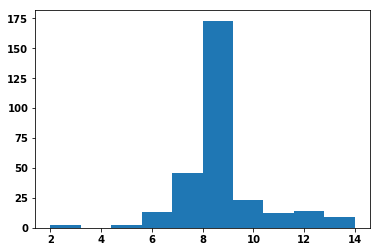

In [140]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([   1.,    0.,    0.,    1.,    2.,    4.,    8.,   19.,  107.,  152.]),
 array([ 32. ,  34.9,  37.8,  40.7,  43.6,  46.5,  49.4,  52.3,  55.2,
         58.1,  61. ]),
 <a list of 10 Patch objects>)

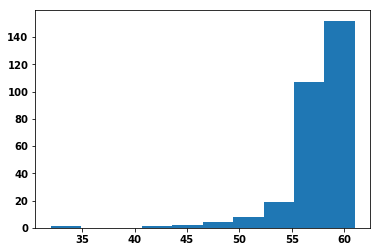

In [141]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   4.,  15.,  28.,  64.,  80.,  71.,  25.,   5.]),
 array([  161.,   331.,   501.,   671.,   841.,  1011.,  1181.,  1351.,
         1521.,  1691.,  1861.]),
 <a list of 10 Patch objects>)

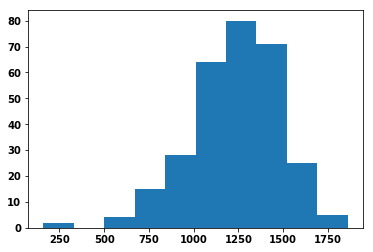

In [142]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   2.,   7.,   8.,  26.,  67.,  64.,  80.,  33.,   5.]),
 array([   85. ,   247.2,   409.4,   571.6,   733.8,   896. ,  1058.2,
         1220.4,  1382.6,  1544.8,  1707. ]),
 <a list of 10 Patch objects>)

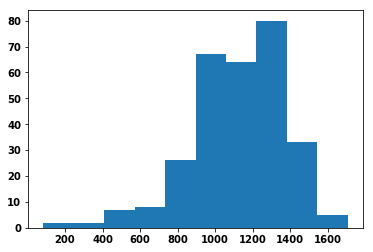

In [143]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

In [144]:
color_order = ['blue' if domain=='bacteria' else 'orange' for domain in df["domain"]]


In [145]:
df["color"] = color_order

In [148]:
font = {'family' : 'normal',
         'size'   : 16}
#         'weight' : 'bold',
       

mpl.rc('font', **font)

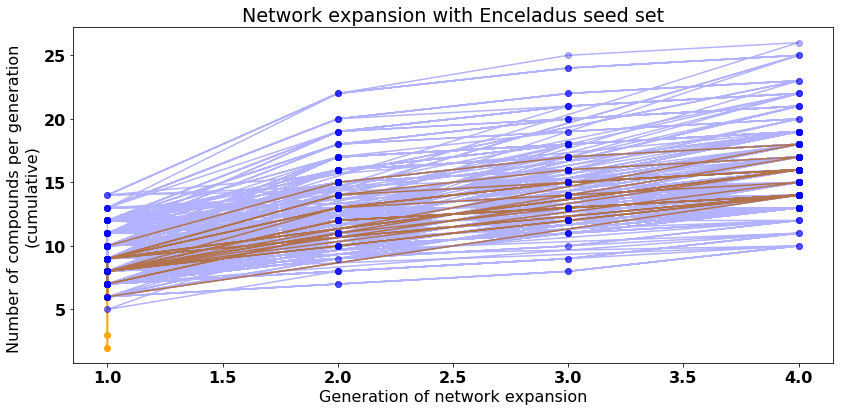

In [149]:
ax = df.loc[df["domain"]=="archaea"].reset_index().plot(kind="line",x="index",y="n_compounds_cumulative", style='-o',color="orange",figsize=(12,6),legend=False)
df.loc[df["domain"]=="bacteria"].reset_index().plot(kind="line",x="index",y="n_compounds_cumulative", style='-o',color="blue",ax=ax, alpha=.3,legend=False)

ax.set_title("Network expansion with Enceladus seed set")
ax.set_xlabel("Generation of network expansion")
ax.set_ylabel("Number of compounds per generation \n(cumulative)")
plt.tight_layout()
# plt.legend(False)


In [40]:
# cool_plots_many(df,'n_compounds_cumulative')

## Check seeds that contain phosphorous

In [154]:
INDIR = "../results/formatted/ph_edge_jsons_P/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [155]:
stats_dicts[0].keys()

['domain',
 u'scope_seeds',
 u'scope_targets',
 'org_id',
 u'scope_compounds',
 'path',
 u'scope_reactions']

(array([   2.,    0.,    2.,   13.,   46.,  173.,   23.,   12.,   14.,    9.]),
 array([  3. ,   4.2,   5.4,   6.6,   7.8,   9. ,  10.2,  11.4,  12.6,
         13.8,  15. ]),
 <a list of 10 Patch objects>)

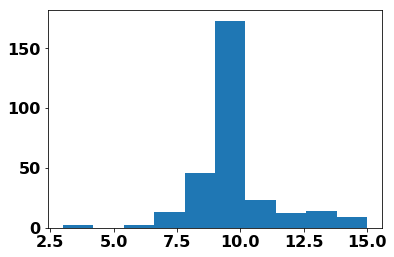

In [156]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([   1.,    0.,    0.,    1.,    2.,    4.,    8.,   19.,  107.,  152.]),
 array([ 32. ,  34.9,  37.8,  40.7,  43.6,  46.5,  49.4,  52.3,  55.2,
         58.1,  61. ]),
 <a list of 10 Patch objects>)

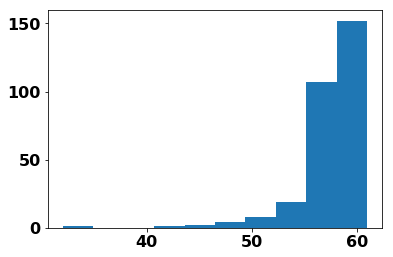

In [157]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   4.,  15.,  28.,  64.,  80.,  71.,  25.,   5.]),
 array([  161.,   331.,   501.,   671.,   841.,  1011.,  1181.,  1351.,
         1521.,  1691.,  1861.]),
 <a list of 10 Patch objects>)

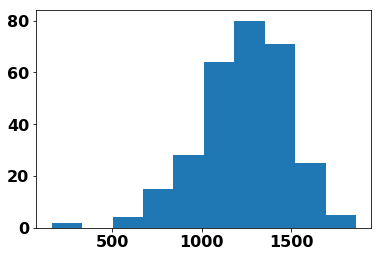

In [158]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   2.,   7.,   8.,  26.,  67.,  64.,  80.,  33.,   5.]),
 array([   85. ,   247.2,   409.4,   571.6,   733.8,   896. ,  1058.2,
         1220.4,  1382.6,  1544.8,  1707. ]),
 <a list of 10 Patch objects>)

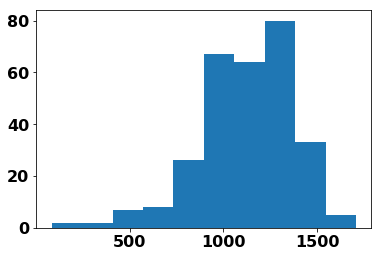

In [159]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

In [160]:
# cool_plots_many(df,'n_compounds_new')

In [161]:
# cool_plots_many(df,'n_compounds_cumulative')

In [162]:
# cool_plots_many(df,'n_targets_cumulative')

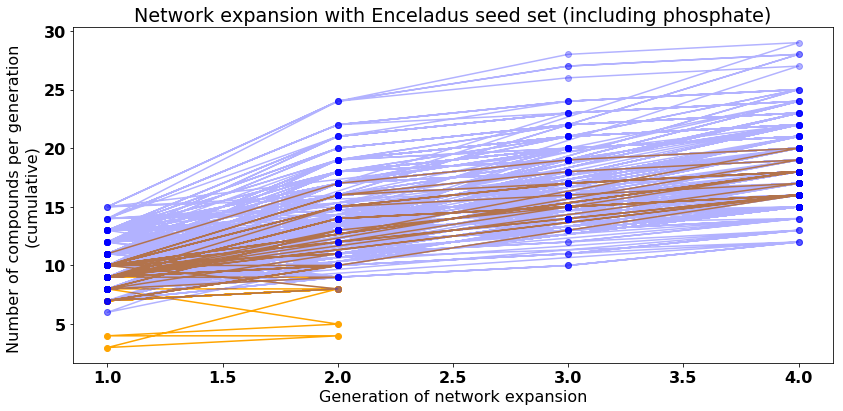

In [164]:
ax = df.loc[df["domain"]=="archaea"].reset_index().plot(kind="line",x="index",y="n_compounds_cumulative", style='-o',color="orange",figsize=(12,6),legend=False)
df.loc[df["domain"]=="bacteria"].reset_index().plot(kind="line",x="index",y="n_compounds_cumulative", style='-o',color="blue",ax=ax, alpha=.3,legend=False)

ax.set_title("Network expansion with Enceladus seed set (including phosphate)")
ax.set_xlabel("Generation of network expansion")
ax.set_ylabel("Number of compounds per generation \n(cumulative)")
plt.tight_layout()

## Reversed expansions

In [144]:
INDIR = "../results/formatted/ph_edge_jsons_reversed/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [153]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00016, C00002, C00065, C00004, C00001, C0000...","[C00075, C00006, C00001, C00360, C00003, C0000...","[R00782, R00243, R00093, R10348, R00114, R0075...","[R00236, R00114, R00516, R02094, R00963, R0015...",[C00001],[C00001],56,56,73,73,1,1,2506520044,archaea
2,"[C00016, C00299, C00009, C00002, C00026, C0006...","[C00299, C00009, C00026, C00048, C00080, C0001...","[R01876, R02331, R00143, R00253, R00782, R0024...","[R01876, R02331, R00143, R00253, R02097, R1009...","[C00001, C00014, C00011, C00283]","[C00014, C00011, C00283]",109,53,196,123,4,3,2506520044,archaea
3,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C01346, C14818, C00288, C01103, C00957, C0045...","[R01876, R02331, R09186, R01388, R00143, R0107...","[R09186, R01388, R01072, R01870, R02323, R0104...","[C00001, C00014, C00011, C00067, C00469, C00283]","[C00067, C00469]",192,83,287,91,6,2,2506520044,archaea
4,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C03826, C00258, C03090, C01185, C00117, C0026...","[R01876, R02331, R09186, R01388, R00143, R0107...","[R03348, R01776, R01083, R01395, R05605, R0224...","[C00001, C00014, C00011, C00067, C00469, C0028...",[C00132],249,57,350,63,7,1,2506520044,archaea
5,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C00007, C03794, C00898, C00081, C01563, C0444...","[R01876, R02331, R09186, R01388, R00143, R0007...","[R00078, R01859, R06180, R00970, R07456, R0694...","[C00001, C00014, C00011, C00067, C00469, C0028...",[],300,51,404,54,7,0,2506520044,archaea


(array([   1.,    0.,    0.,    1.,    2.,    4.,    8.,   19.,  107.,  152.]),
 array([ 33. ,  35.9,  38.8,  41.7,  44.6,  47.5,  50.4,  53.3,  56.2,
         59.1,  62. ]),
 <a list of 10 Patch objects>)

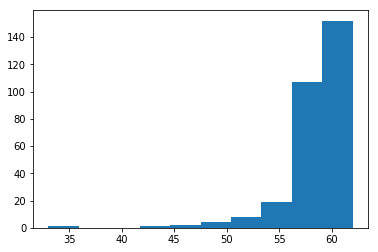

In [145]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([   2.,    0.,    2.,   13.,   46.,  173.,   23.,   12.,   14.,    9.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

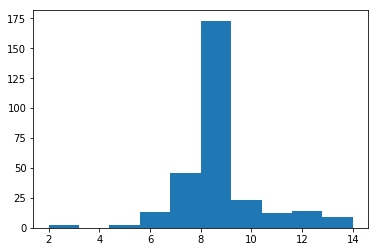

In [146]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   4.,  15.,  28.,  64.,  80.,  71.,  25.,   5.]),
 array([  161.,   331.,   501.,   671.,   841.,  1011.,  1181.,  1351.,
         1521.,  1691.,  1861.]),
 <a list of 10 Patch objects>)

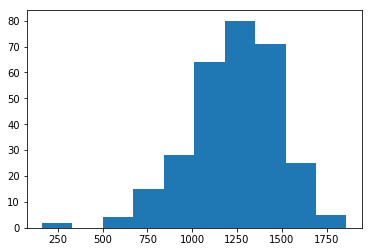

In [147]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   2.,   7.,   8.,  26.,  67.,  64.,  80.,  33.,   5.]),
 array([   85. ,   247.2,   409.4,   571.6,   733.8,   896. ,  1058.2,
         1220.4,  1382.6,  1544.8,  1707. ]),
 <a list of 10 Patch objects>)

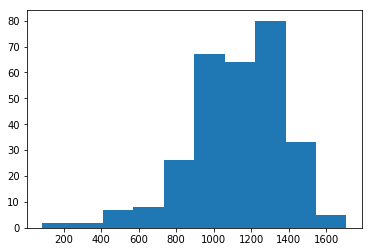

In [148]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

In [152]:
# cool_plots_many(df,'n_compounds_new')

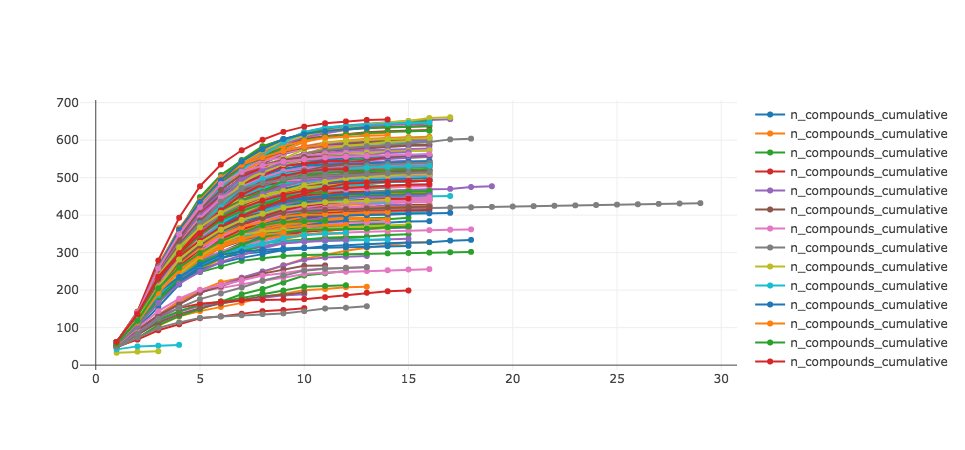

In [150]:
cool_plots_many(df,'n_compounds_cumulative')

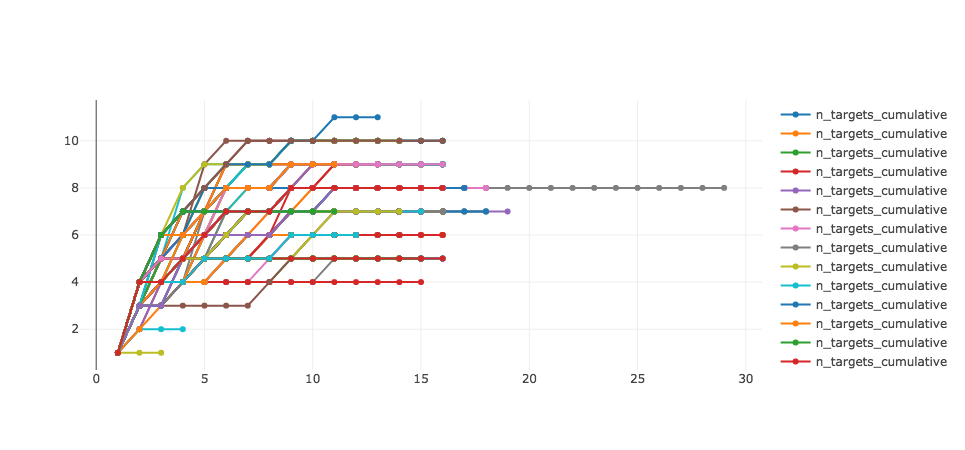

In [151]:
cool_plots_many(df,'n_targets_cumulative')

## - This lets me know that I need to start with targets and work backwards to try and figure out seeds necessary to produce those targets.

## Using all KEGGs reactions

In [88]:
INDIR = "../results/formatted/kegg_edge_json_P/"

generation_dfs, stats_dicts = read_formatted_json_single(INDIR)
# print len(generation_dfs)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = generation_dfs[0]

In [89]:
len(stats_dicts[0])

7

In [90]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00001, C00009, C01326, C00132, C00067, C0001...","[C06547, C20783, C01548, C00014, C00011, C0006...","[R10092, R05539, R09139, R00067, R00132, R0235...","[R10535, R10079, R10092, R00131, R09139, R0000...",[],[],19,19,24,24,0,0,reaction_edges_P,bacteria
2,"[C00001, C00080, C00007, C00026, C00009, C0132...","[C00080, C00007, C00026, C00013, C00288, C0535...","[R10092, R00608, R05539, R00279, R00748, R0013...","[R00608, R00279, R00748, R00138, R03546, R0914...",[],[],43,24,64,40,0,0,reaction_edges_P,bacteria
3,"[C00001, C00080, C00007, C00026, C00009, C0004...","[C00048, C00025, C00704, C00022, C00346, C0022...","[R00782, R10092, R06870, R00608, R00258, R0553...","[R00782, R06870, R00258, R08886, R00475, R0000...",[C00025],[C00025],73,30,164,100,1,1,reaction_edges_P,bacteria
4,"[C00001, C00080, C00007, C00026, C00009, C0004...","[C02798, C00036, C00546, C00097, C00037, C0006...","[R00340, R04051, R00363, R00782, R10092, R1017...","[R00340, R04051, R00363, R10178, R02914, R0727...","[C00025, C00097, C00037, C00065, C00064, C00041]","[C00097, C00037, C00065, C00064, C00041]",162,89,326,162,6,5,reaction_edges_P,bacteria
5,"[C00001, C00080, C00007, C02107, C00026, C0000...","[C02107, C03826, C00383, C02091, C00108, C0095...","[R00340, R09186, R10908, R03106, R03551, R0405...","[R09186, R10908, R03106, R03551, R03694, R0696...","[C00025, C00097, C00037, C00065, C00064, C0004...","[C00049, C00188]",271,109,455,129,8,2,reaction_edges_P,bacteria


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 18.5,  18.6,  18.7,  18.8,  18.9,  19. ,  19.1,  19.2,  19.3,
         19.4,  19.5]),
 <a list of 10 Patch objects>)

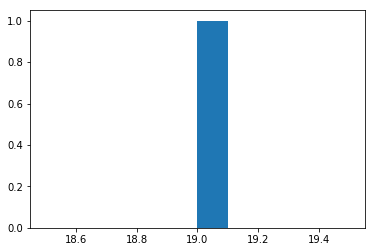

In [91]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 62.5,  62.6,  62.7,  62.8,  62.9,  63. ,  63.1,  63.2,  63.3,
         63.4,  63.5]),
 <a list of 10 Patch objects>)

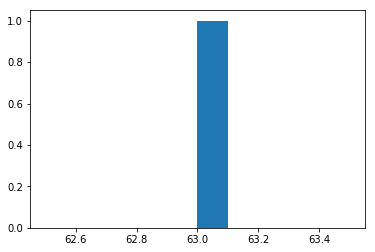

In [92]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 8278.5,  8278.6,  8278.7,  8278.8,  8278.9,  8279. ,  8279.1,
         8279.2,  8279.3,  8279.4,  8279.5]),
 <a list of 10 Patch objects>)

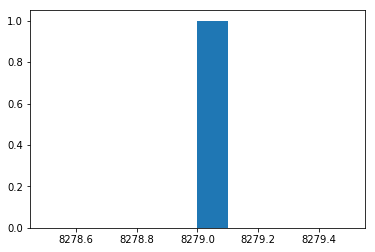

In [93]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 10286.5,  10286.6,  10286.7,  10286.8,  10286.9,  10287. ,
         10287.1,  10287.2,  10287.3,  10287.4,  10287.5]),
 <a list of 10 Patch objects>)

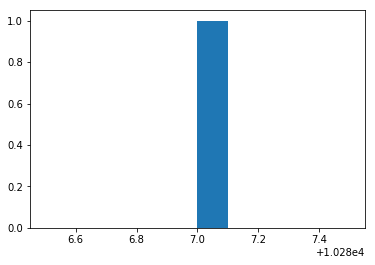

In [94]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

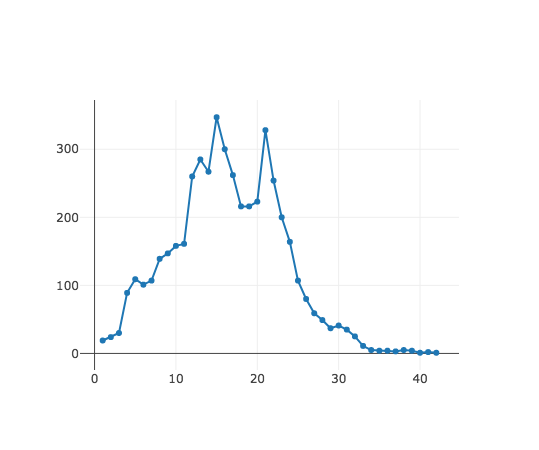

In [95]:
cool_plots_many(df,'n_compounds_new')

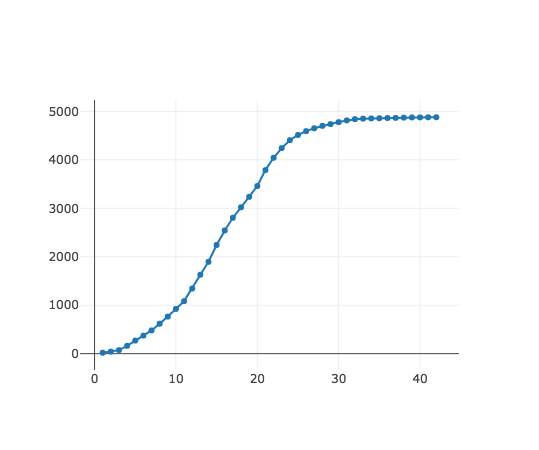

In [96]:
cool_plots_many(df,'n_compounds_cumulative')

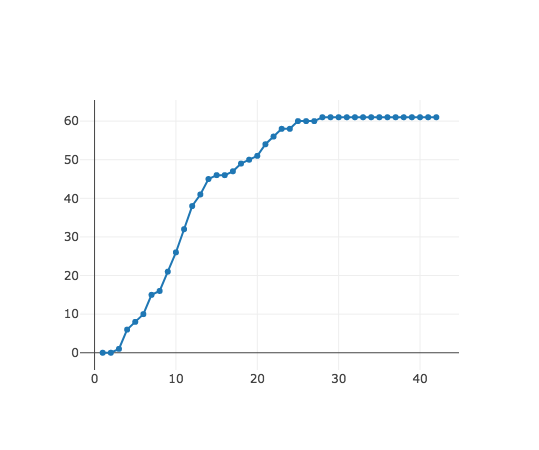

In [97]:
cool_plots_many(df,'n_targets_cumulative')

### Check if the targets columns were erroneous

#### Add map pathway data too?

#### Adding target data could be done post-processing as well

In [168]:
set(datajson["stats"]["scope_targets"])&set(generations["compounds_cumulative"][25])

set()

In [169]:
generations['compounds_cumulative'].apply(lambda x: [cpd for cpd in datajson["stats"]["scope_targets"] if cpd in x])


1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
14    []
15    []
16    []
17    []
18    []
19    []
20    []
21    []
22    []
23    []
24    []
25    []
Name: compounds_cumulative, dtype: object

#### They don't appear to be.

## Plot

In [177]:
def cool_plots(df,line1,line2):

    # Create traces
    trace0 = go.Scatter(
        x = df.index,
        y = df[line1],
        mode = 'lines+markers+text',
        name = line1,
        text=df['tags'],
        textposition='top center'
    #     text= data['state']
    )
    trace1 = go.Scatter(
        x = df.index,
        y = df[line2],
        mode = 'lines+markers',
        name = line2
    )

    data = [trace0,trace1]
    plotly.offline.iplot(data)

In [41]:
df["org_id"].unique()

array(['2506520044', '2506783009', '2517287024', '2529293002',
       '2529293211', '2531839260', '2554235474', '2554235476',
       '2554235477', '2554235490', '2554235497', '2718217646',
       '2718217664', '2718217665', '2718217666', '2718217667',
       '2721755430', '2721755431', '2721755892', '2721755895',
       '2724679803', '2728369738', '2739367758', '2740891997', '638154515',
       '644736411', '644736412', '650716079', '2515154133', '2515154138',
       '2515154140', '2515154141', '2515154152', '2517572146',
       '2518645608', '2518645611', '2519899518', '2521172661',
       '2523533532', '2523533546', '2523533611', '2523533612',
       '2524614558', '2524614663', '2524614672', '2524614757',
       '2524614857', '2524614862', '2524614884', '2540341173',
       '2546825502', '2546825503', '2558309102', '2563366730',
       '2565956515', '2565956590', '2571042909', '2574179701',
       '2574179723', '2574180435', '2574180450', '2582580728',
       '2582581268', '258258127

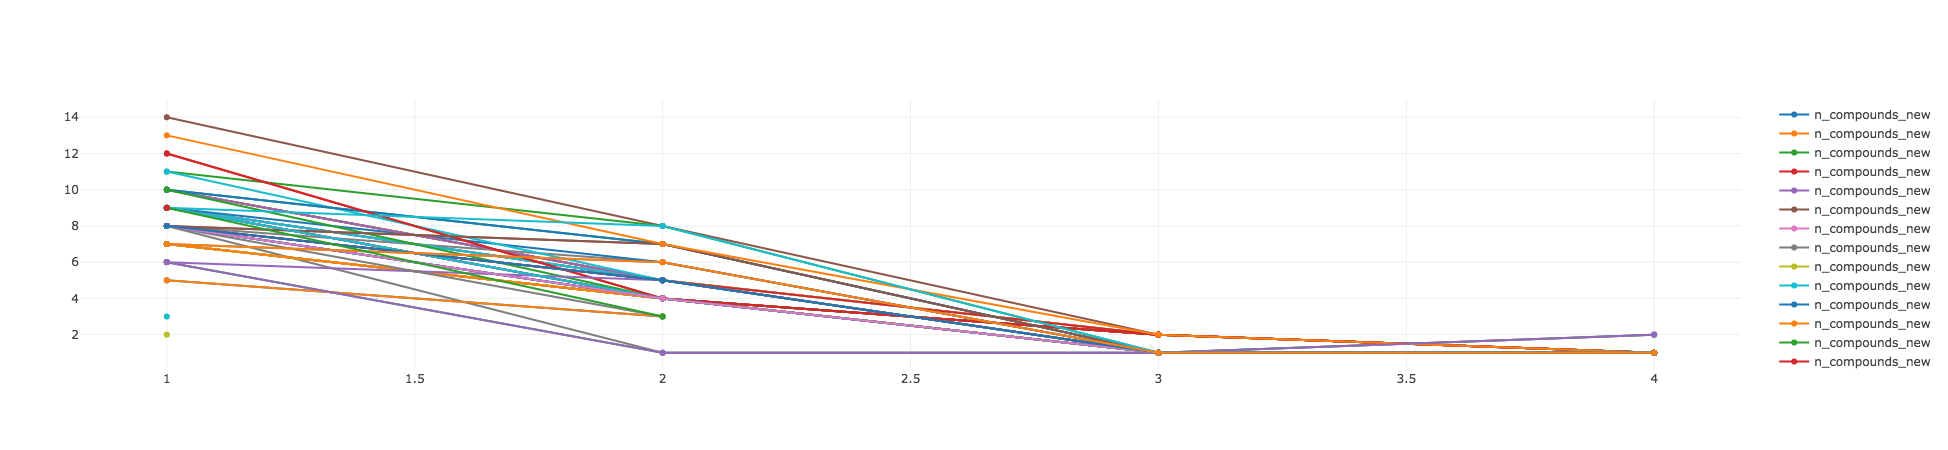

In [47]:
cool_plots_many(df,'n_compounds_new')

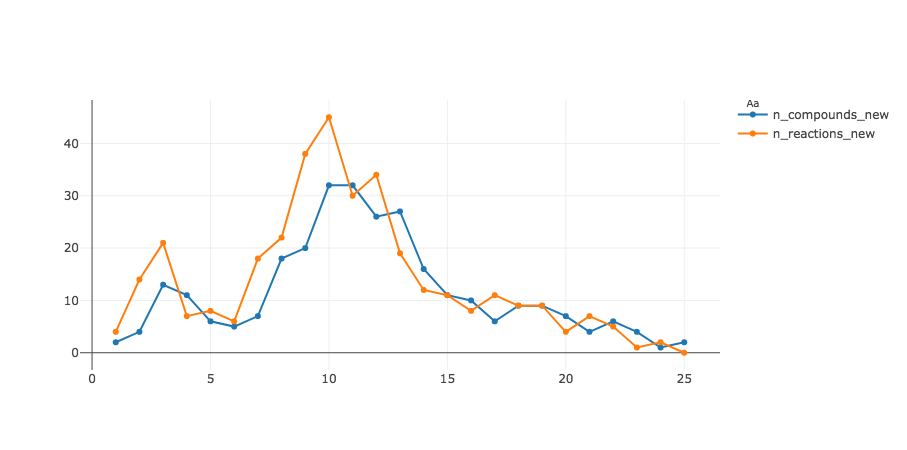

In [178]:
cool_plots(generations,'n_compounds_new','n_reactions_new')

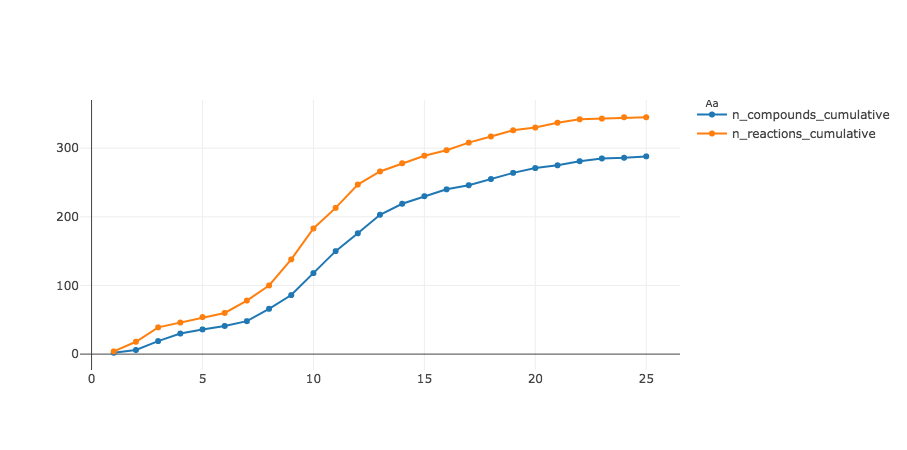

In [179]:
cool_plots(generations,'n_compounds_cumulative','n_reactions_cumulative')